#LDA Assignment
Done by:

- Name: Siddharth Sudhakar
- Roll No.: 25901335

Goal: To project a dataset onto a lower-dimensional space with good class-separability

In [1]:
import numpy as np

In [2]:
class LDA:
  def __init__(self, n_components):
    self.n_components = n_components
    self.linear_discriminants = None # to store the eigenvectors

  def fit(self, X, y):
    n_features = X.shape[1]
    class_labels = np.unique(y)

    #S_W, S_B
    mean_overall = np.mean(X,axis=0)
    S_W = np.zeros((n_features,n_features))
    S_B = np.zeros((n_features,n_features))

    for c in class_labels:
      X_c = X[y==c]
      mean_c = np.mean(X_c, axis=0)
      # (n_features,n_c) * (n_c,n_features)
      S_W += (X_c - mean_c).T.dot(X_c - mean_c)

      n_c = X_c.shape[0]
      mean_diff = (mean_c - mean_overall).reshape(n_features,1)
      S_B += n_c * (mean_diff).dot(mean_diff.T)

    A = np.linalg.inv(S_W).dot(S_B)
    eigenvalues, eigenvectors = np.linalg.eigh(A)
    eigenvectors = eigenvectors.T
    idxs = np.argsort(abs(eigenvalues))[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]
    self.linear_discriminants = eigenvectors[0:self.n_components]

  def transform(self, X):
    # Project data onto the new components
    return np.dot(X, self.linear_discriminants.T)

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
data = datasets.load_iris()
X, y = data.data, data.target

In [5]:
# Project the data onto the 2 primary linear discriminants
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


In [10]:
X_projected[:5]

array([[2.00806064, 3.14737415],
       [2.018541  , 3.01099253],
       [1.87064661, 2.89140258],
       [2.0026867 , 2.93727494],
       [1.97040897, 3.11252288]])

In [6]:
x1, x2 = X_projected[:, 0], X_projected[:, 1]

/tmp/ipython-input-3868236875.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)


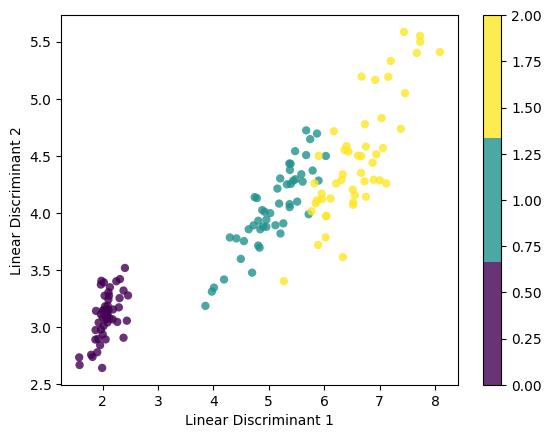

In [7]:
plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()